In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
reviews = pd.read_csv('turtle_reviews.csv')

# Explore the dataset
print(reviews.head())
print(reviews.dtypes)
print(reviews.info())

# Check for missing values
print(reviews.isnull().sum())

# Drop redundant columns
reviews.drop(['language', 'platform'], axis=1, inplace=True)

# Rename columns
reviews.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'}, inplace=True)



reviews.to_csv('cleaned_reviews.csv', index=False)

clean_reviews = pd.read_csv('cleaned_reviews.csv')
print(clean_reviews.shape)
print(clean_reviews.info())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

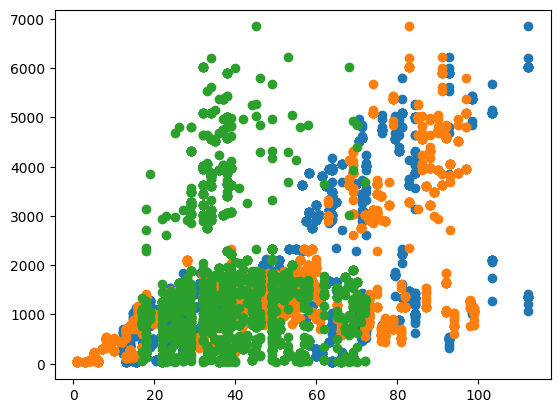

In [8]:
# Extract the relevant columns
X_renumeration = clean_reviews[['renumeration']]
X_spending_score = clean_reviews[['spending_score']]
X_age = clean_reviews[['age']]
y = clean_reviews['loyalty_points']

plt.scatter(X_renumeration, y)
plt.scatter(X_spending_score, y)
plt.scatter(X_age, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          2.43e-209
Time:                        17:48:26   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -65.6865     52.171     -1.

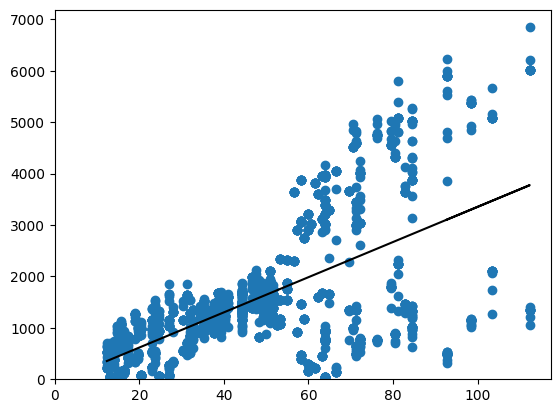

In [9]:
# Create formula and pass through OLS methods.
f = 'y ~ X_renumeration'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

y_pred = (-65.6865) + 34.1878 * clean_reviews['renumeration']
y_pred

# Plot the data points with a scatterplot.
plt.scatter(X_renumeration, y)

# Plot the regression line (in black).
plt.plot(X_renumeration, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          2.92e-263
Time:                        17:48:27   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -75.0527     45.931  

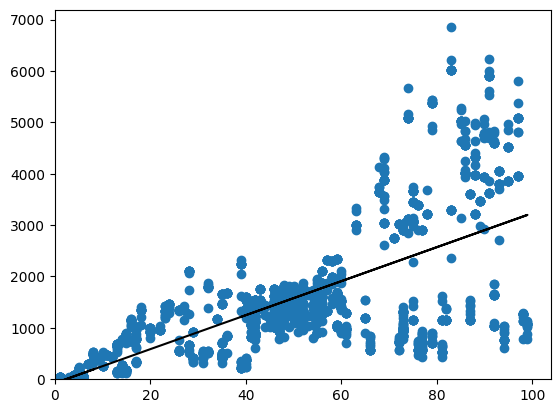

In [10]:
# Create formula and pass through OLS methods.
f = 'y ~ X_spending_score'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

y_pred = (-75.0527) + 33.0617 * clean_reviews['spending_score']
y_pred

# Plot the data points with a scatterplot.
plt.scatter(X_spending_score, y)

# Plot the regression line (in black).
plt.plot(X_spending_score, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 02 Sep 2023   Prob (F-statistic):             0.0577
Time:                        17:48:27   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

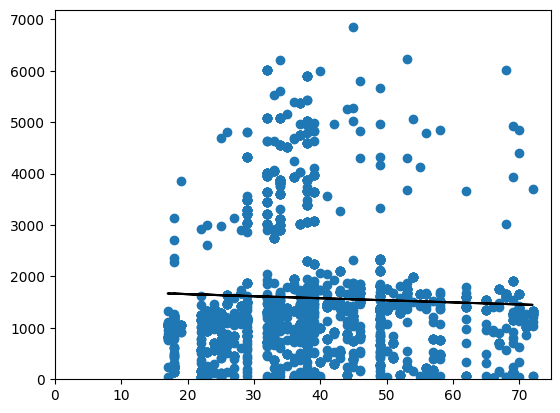

In [11]:
# Create formula and pass through OLS methods.
f = 'y ~ X_age'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
print(test.summary())

# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

y_pred = (1736.5177) + -4.0128 * clean_reviews['age']
y_pred

# Plot the data points with a scatterplot.
plt.scatter(X_age, y)

# Plot the regression line (in black).
plt.plot(X_age, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

In [12]:
df2 = clean_reviews[["gender", "renumeration", "spending_score"]]
print(df2.isnull().sum())
print(df2.describe())
print(df2)

gender            0
renumeration      0
spending_score    0
dtype: int64
       renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000
      gender  renumeration  spending_score
0       Male         12.30              39
1       Male         12.30              81
2     Female         13.12               6
3     Female         13.12              77
4     Female         13.94              40
...      ...           ...             ...
1995  Female         84.46              69
1996  Female         92.66               8
1997    Male         92.66              91
1998    Male         98.40              16
1999    Male         92.66               8

[2000 rows x 3 columns]


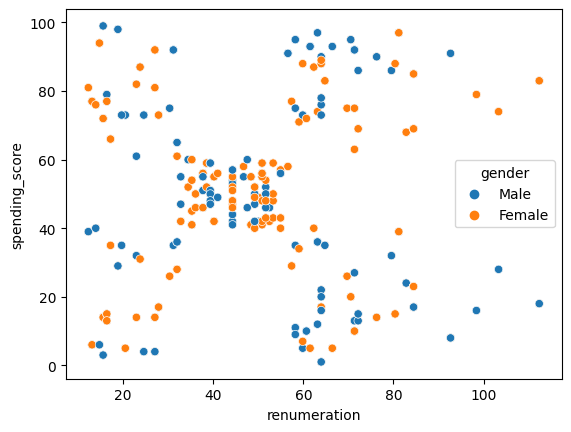

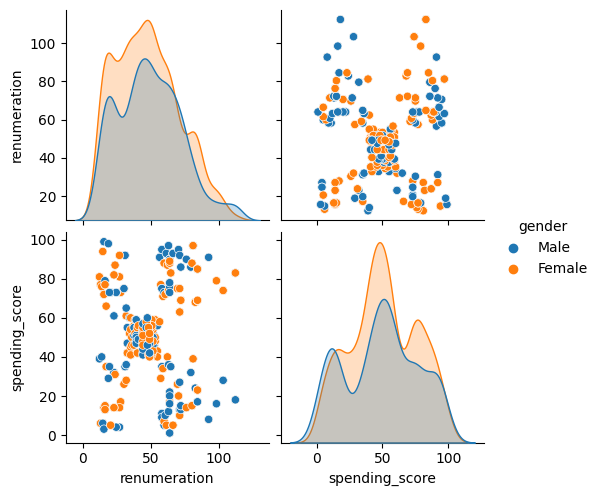

In [13]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2,
                hue='gender')


# Create a pairplot with Seaborn.
x = df2[['renumeration', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             hue='gender',
             diag_kind= 'kde')

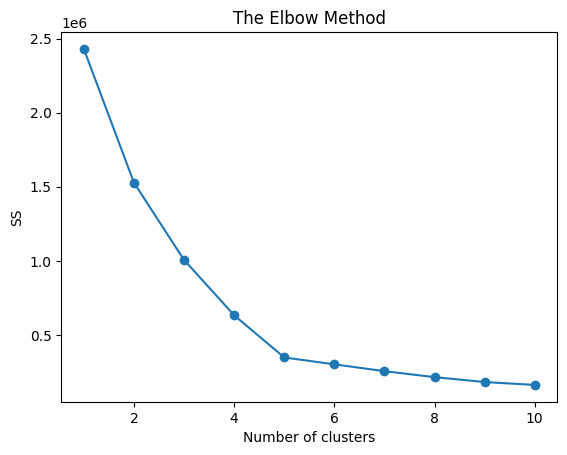

In [14]:
#Elbow method
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

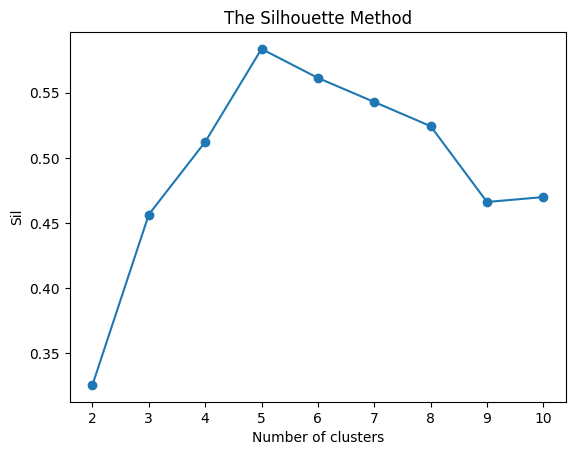

In [15]:
#Silhouette Method
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Text(0.5, 1.0, 'k=4')

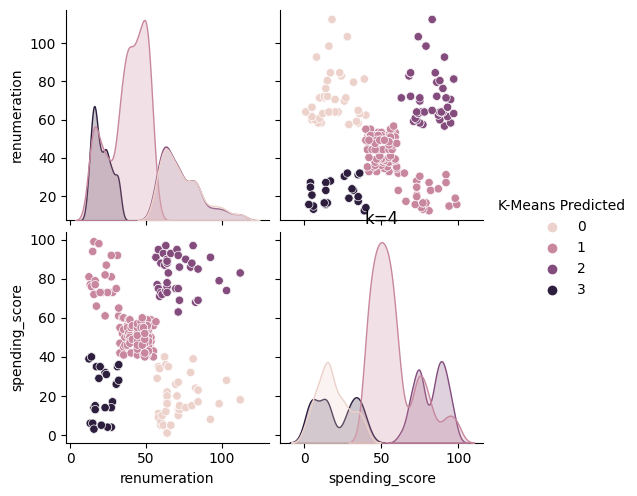

In [16]:
#Using k=4
# Using k=4
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.title('k=4')

In [17]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

In [18]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


Text(0.5, 1.0, 'k=4')

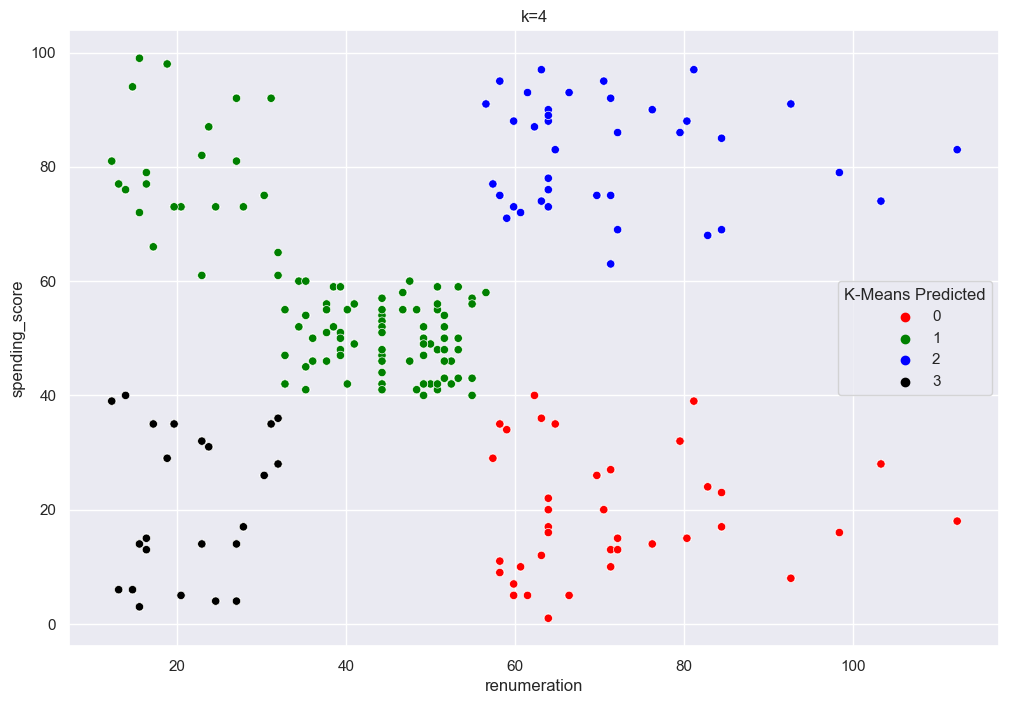

In [19]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration',
                y='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.title('k=4')

Text(0.5, 1.0, 'k=5')

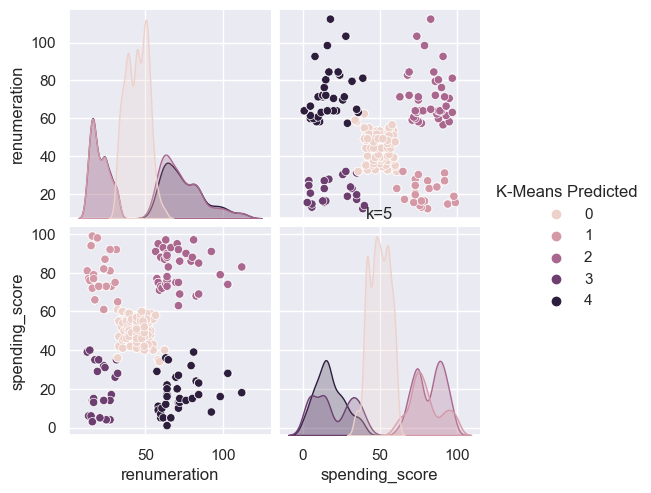

In [20]:
#Using k=5
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.title('k=5')

In [21]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [22]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


Text(0.5, 1.0, 'k=5')

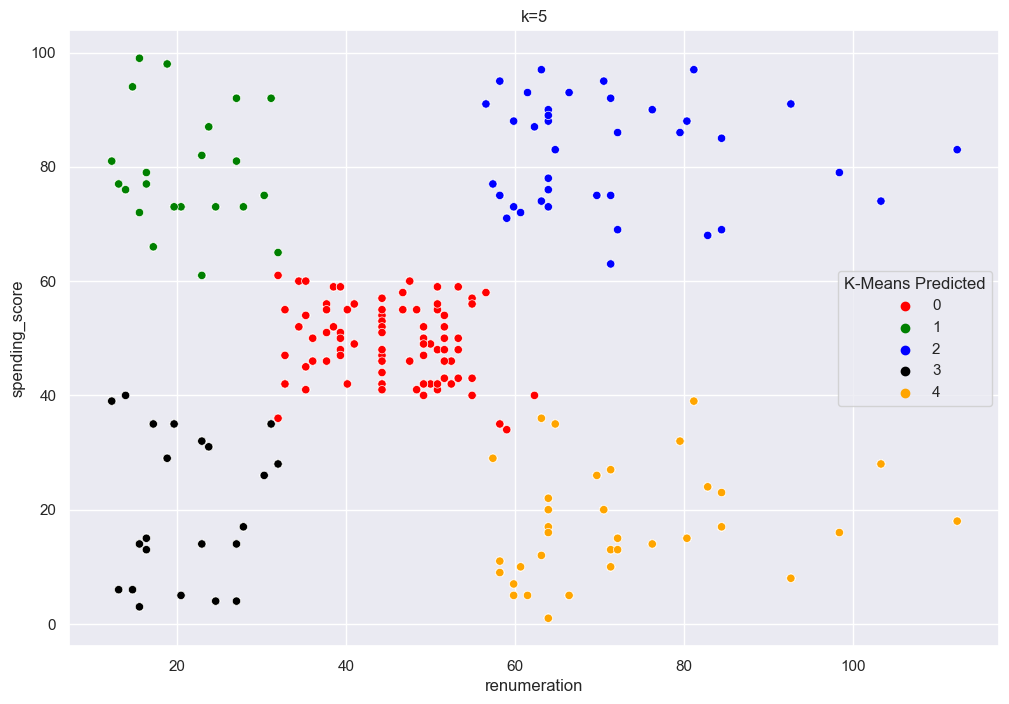

In [23]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration',
                y='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.title('k=5')

Text(0.5, 1.0, 'k=6')

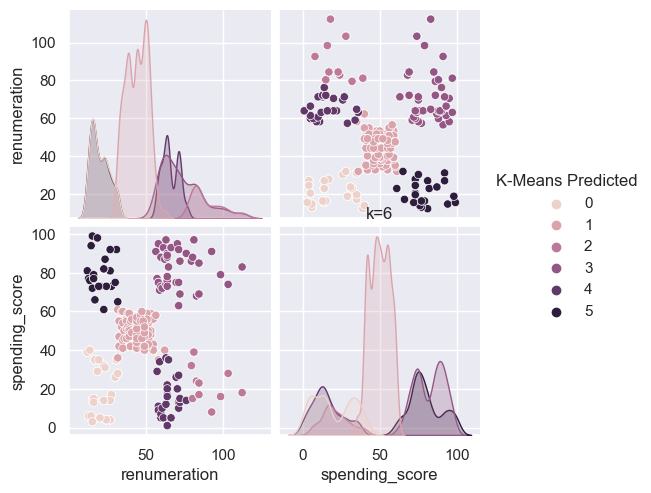

In [24]:
#Using k=6
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
plt.title('k=6')

In [25]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
3    356
0    271
5    269
4    214
2    123
Name: K-Means Predicted, dtype: int64

In [26]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  0
1         12.30              81                  5
2         13.12               6                  0
3         13.12              77                  5
4         13.94              40                  0


Text(0.5, 1.0, 'k=6')

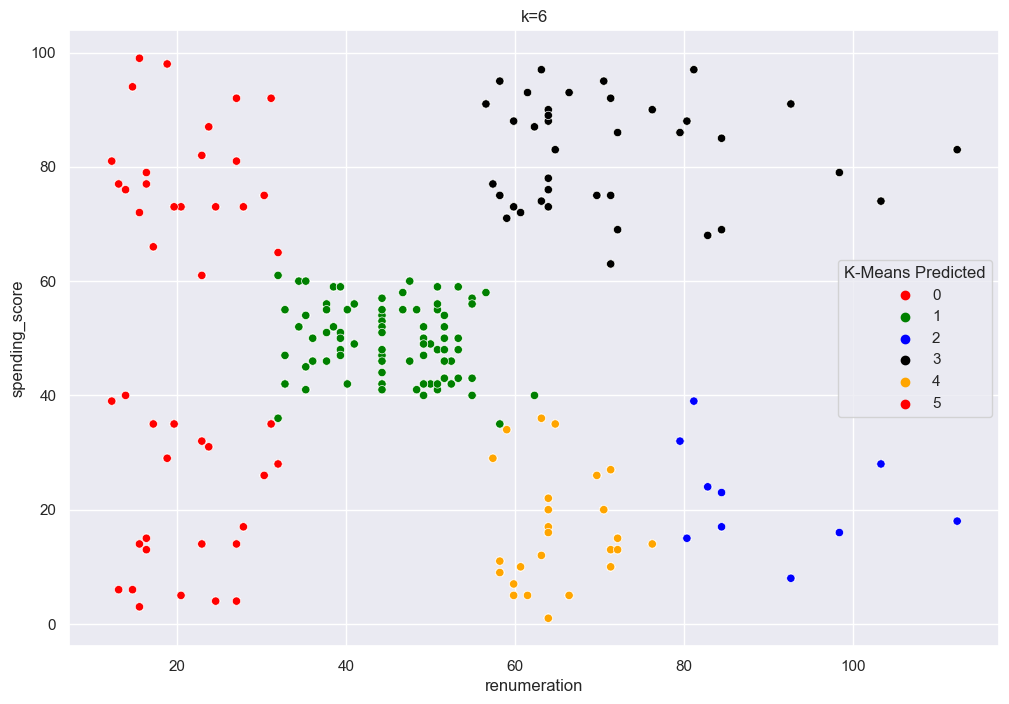

In [27]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='renumeration',
                y='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])
plt.title('k=6')

Look for the "elbow point" on the plot. The elbow point is where the rate of decrease in WCSS sharply changes. This point often corresponds to the optimal number of clusters.

Compute the silhouette score for different numbers of clusters and choose the number that yields the highest score.

k=5 is the optimal cluster
